In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualisation des données

dataset: https://www.kaggle.com/datasets/arjuntejaswi/plant-village

In [4]:
taille_image = 256
nb_elem_par_group = 50

In [7]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "Tomates",
    shuffle= True,
    image_size= (taille_image,taille_image),
    batch_size= nb_elem_par_group
)

Found 5452 files belonging to 4 classes.


In [9]:
nb_classe = len(data.class_names)
nb_classe

4

In [11]:
len(data) # nombre de groupe (batch)

110

In [13]:
data.class_names # les differentes classe (groupe de tomates)

['Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_healthy']


1. **Tomate_Mildiou_Précoce (Tomato_Early_blight)** : C'est une maladie fongique causée par *Alternaria solani*, qui affecte les feuilles, les tiges et parfois les fruits des tomates. Elle provoque des taches sombres et concentriques sur les feuilles, qui finissent par tomber, réduisant la photosynthèse et la vigueur de la plante.

2. **Tomate_Mildiou_Tardif (Tomato_Late_blight)** : Causé par le pathogène *Phytophthora infestans*, cette maladie se manifeste par des taches sombres et humides sur les feuilles, les tiges et les fruits. Le mildiou tardif se développe surtout dans des conditions humides et fraîches et peut causer des pertes importantes de récolte.

3. **Tomate_Moisissure_Foliaire (Tomato_Leaf_Mold)** : Cette infection est due au champignon *Passalora fulva*. Elle se caractérise par des taches jaunes sur le dessus des feuilles et une moisissure veloutée de couleur olive ou grise sur la face inférieure. La maladie touche principalement les tomates cultivées en serre.

4. **Tomate_Saine (Tomato_healthy)** : Cette classe représente les plantes de tomate en bonne santé, sans signes visibles de maladies ou de stress. Les feuilles sont vertes, sans taches ni décolorations, et la plante pousse normalement.


In [16]:
nom_class = data.class_names
nom_class

['Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_healthy']

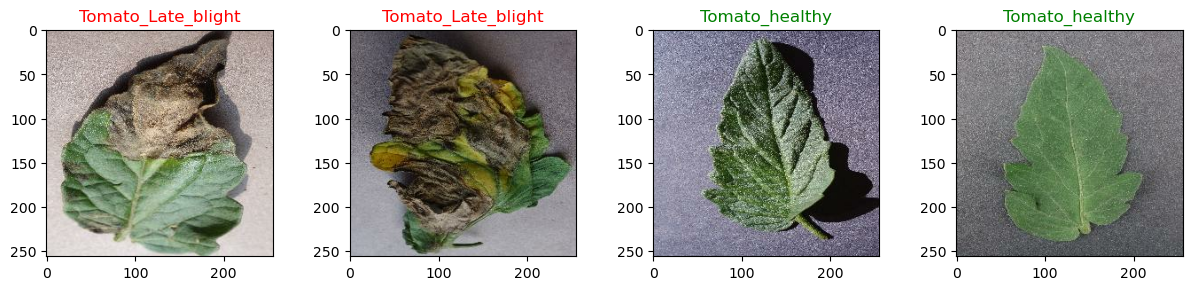

In [18]:
plt.figure(figsize=(15,10))
color = {
    "Tomato_Early_blight": "black",
    "Tomato_Late_blight":"red",
    "Tomato_Leaf_Mold": "yellow",
    "Tomato_healthy": "green"
    
}
for image, titre in data.take(1):
    for i in range(4):
        plt.subplot(3,4,i+5)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(nom_class[titre[i]],color=color[nom_class[titre[i]]])

# Decoupage de la donnée

In [21]:
n_data = len(data)
n_data

110

### 80 % pour l'entrainement
### 10 % pour la validation
### 10 % pour le test

In [24]:
Train_size = int(0.8*n_data)
val_size = int(n_data*0.1)
Train_size, val_size

(88, 11)

In [26]:
train_data = data.take(Train_size)
validation_data = data.skip(Train_size).take(val_size)
test_data = data.skip(Train_size).skip(val_size)

In [28]:
len(train_data),len(validation_data),len(test_data)

(88, 11, 11)

### Cette méthode afin d'optimiser l'utilisation de la mémoire

In [31]:
New_train_data = train_data.cache().shuffle(2500).prefetch(buffer_size=tf.data.AUTOTUNE)
New_validation_data = validation_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
New_test_data =test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Construction du Modèle

https://www.tensorflow.org/guide/keras/sequential_model?hl=fr

In [35]:
model = models.Sequential([
    layers.Input(shape=(taille_image,taille_image,3)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(nb_classe,activation="softmax")
])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,388 (3.42 MB)

 Trainable params: 896,388 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
    optimizer="adam",
    loss= "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [41]:
parcours = model.fit(New_train_data,epochs=7,batch_size=32,validation_data=New_validation_data,verbose=1)

Epoch 1/7
88/88 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.4490 - loss: 15.1145 - val_accuracy: 0.8000 - val_loss: 0.5527
Epoch 2/7
88/88 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.7955 - loss: 0.5183 - val_accuracy: 0.8636 - val_loss: 0.4400
Epoch 3/7
88/88 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8687 - loss: 0.3445 - val_accuracy: 0.8618 - val_loss: 0.4562
Epoch 4/7
88/88 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8860 - loss: 0.3004 - val_accuracy: 0.8782 - val_loss: 0.4272
Epoch 5/7
88/88 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9187 - loss: 0.2299 - val_accuracy: 0.9055 - val_loss: 0.4508
Epoch 6/7
88/88 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9397 - loss: 0.1673 - val_accuracy: 0.9018 - val_loss: 0.4820
Epoch 7/7
88/88 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.9484 - loss: 0.1378 - val_accuracy: 0.8964 - val_loss: 0.4297


In [33]:
model.evaluate(New_test_data)

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 777ms/step - accuracy: 0.8818 - loss: 0.4018


[0.3798138201236725, 0.892430305480957]

In [43]:
parcours.history

{'accuracy': [0.596818208694458,
  0.7972727417945862,
  0.8638636469841003,
  0.8779545426368713,
  0.909318208694458,
  0.9406818151473999,
  0.9502272605895996],
 'loss': [4.723993301391602,
  0.5139884948730469,
  0.35492074489593506,
  0.31978997588157654,
  0.2486923187971115,
  0.16196683049201965,
  0.1324828416109085],
 'val_accuracy': [0.800000011920929,
  0.8636363744735718,
  0.8618181943893433,
  0.8781818151473999,
  0.9054545164108276,
  0.9018181562423706,
  0.8963636159896851],
 'val_loss': [0.5527365803718567,
  0.43995290994644165,
  0.45622503757476807,
  0.4271658658981323,
  0.45077288150787354,
  0.48197588324546814,
  0.4297337830066681]}

In [47]:
accuracy = parcours.history["accuracy"]
val_accuracy = parcours.history["val_accuracy"]
loss = parcours.history["loss"]
val_loss = parcours.history["val_loss"]

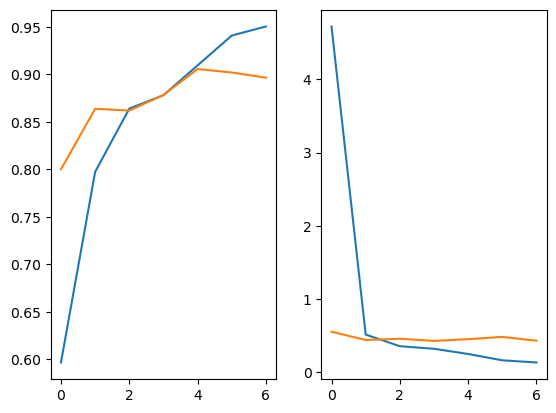

In [49]:
plt.subplot(1,2,1)
plt.plot(accuracy)
plt.plot(val_accuracy)

plt.subplot(1,2,2)
plt.plot(loss)
plt.plot(val_loss)

In [55]:
prediction = model.predict(New_test_data)

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step


In [56]:
np.argmax(prediction[0])

0

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


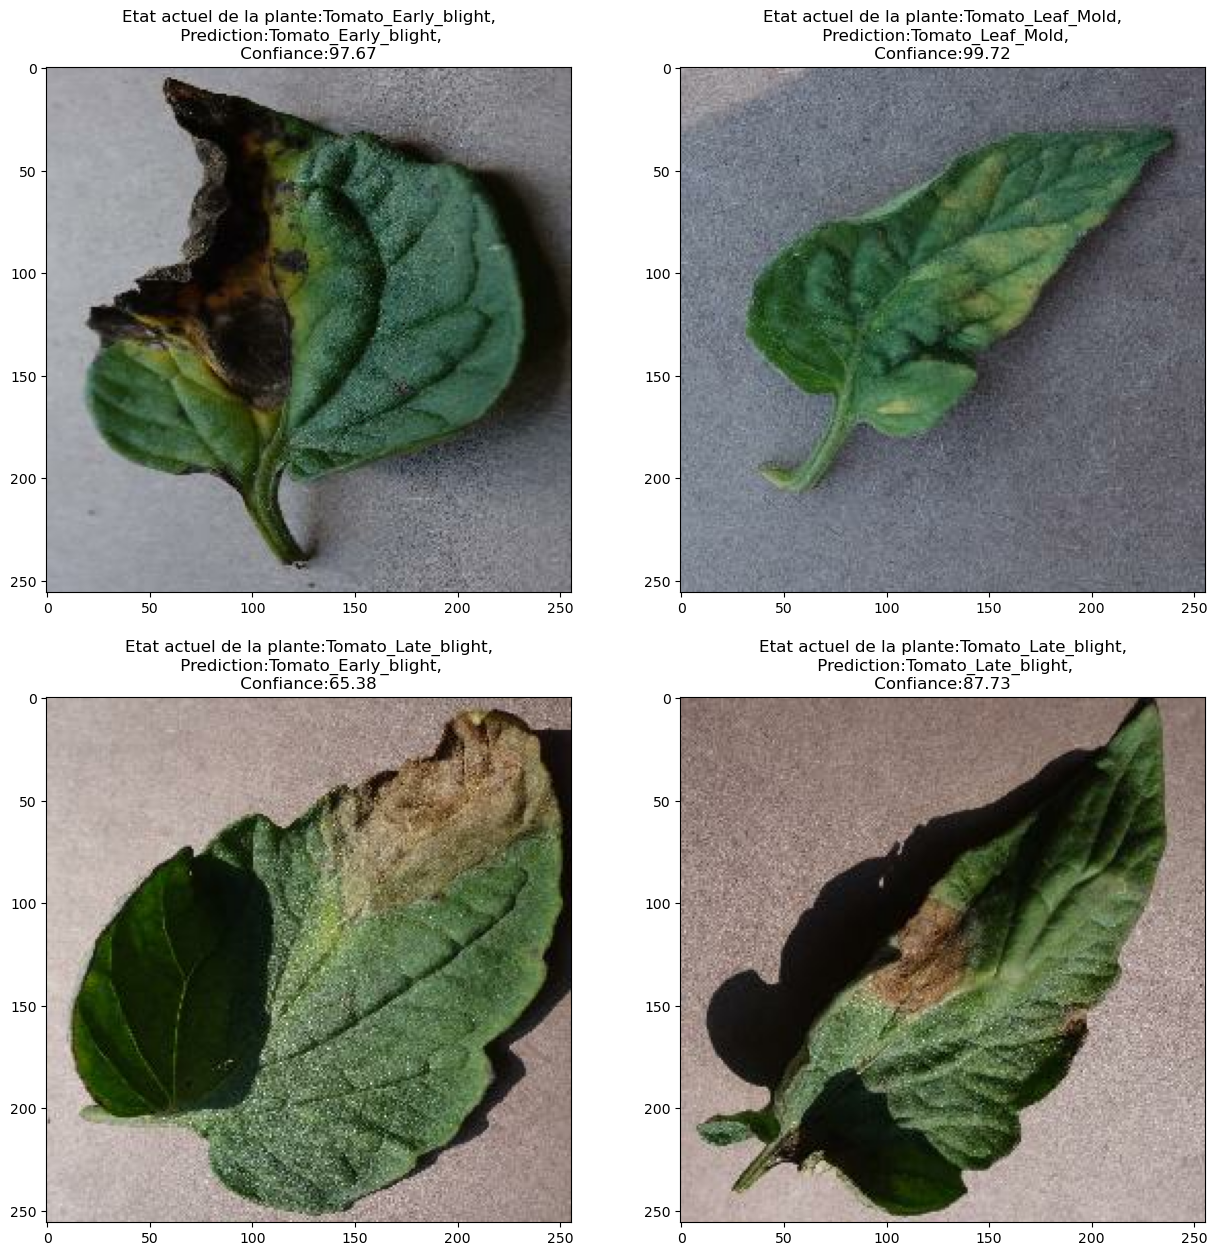

In [59]:
plt.figure(figsize=(15,15))
for image,label in New_test_data.take(1):
    for i in range(4):
        plt.subplot(2,2,i+1)
        f_img = image[i].numpy().astype("uint8")
        f_lab = label[i].numpy()
    
        plt.imshow(f_img)
        #print("Etat actuel de la plante:",nom_class[f_lab] )
    
        b_prediction = model.predict(image)
        confiance = round(np.max(b_prediction[i]) *100,2)
        #print("Etat prédit: ",nom_class[np.argmax(b_prediction[i])])
        plt.title(f"Etat actuel de la plante:{nom_class[f_lab]},\n Prediction:{nom_class[np.argmax(b_prediction[i])]},\n Confiance:{confiance} ")

In [63]:
model_version = 1
model.save(f"Model_{model_version}.keras")